# Titanic - Machine Learning from Disaster

Source : https://www.kaggle.com/competitions/titanic/data

Author : HUYNH Tram-Anh

## preprocessing data

In [2]:
import pandas as pd
import tabulate as tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv",header=0)
len(df)

891

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#delete : name, ticket, embarked, cabin (nhieu NA)

In [5]:
df = df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]

In [6]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#remove NA values
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
#combine features
df["num_family_member"] = df["SibSp"] + df["Parch"]

In [12]:
df.drop(["SibSp","Parch"], axis=1, inplace=True)

In [13]:
#change male, female --> 0,1
df["Sex"].replace(["male"], 1, inplace=True)
df["Sex"].replace(["female"], 0, inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,num_family_member
0,1,0,3,1,22.0,7.2500,1
1,2,1,1,0,38.0,71.2833,1
2,3,1,3,0,26.0,7.9250,0
3,4,1,1,0,35.0,53.1000,1
4,5,0,3,1,35.0,8.0500,0


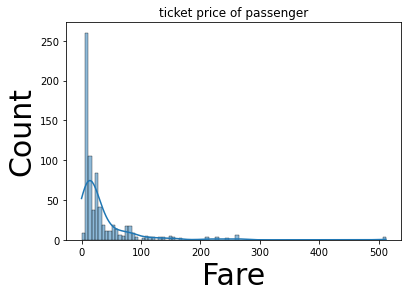

In [15]:
#visualisation : gia ve
sns.histplot(data=df["Fare"], kde=True) #kernel density line
plt.title("ticket price of passenger")
plt.xlabel("Fare", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.show()

#outliers ?

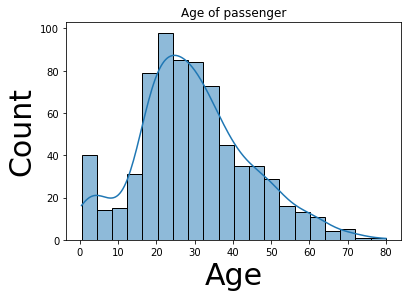

In [16]:
#visualisation : Age
sns.histplot(data=df["Age"], kde=True) #kernel density line
plt.title("Age of passenger")
plt.xlabel("Age", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.show()

In [17]:
min(df["Age"])

0.42

## task 1 : do tuoi trung binh cua hanh khach theo hang ve

In [18]:
task1 = df[["Pclass","Age"]]

In [19]:
task1.groupby("Pclass").mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


## task 2 : Co bao nhieu hanh khach nu tren khoang hang nhat

In [20]:
task2 = df[(df["Pclass"]==1)&(df["Sex"]==0)]["Sex"]
task2.count()

85

<AxesSubplot:xlabel='Pclass', ylabel='count'>

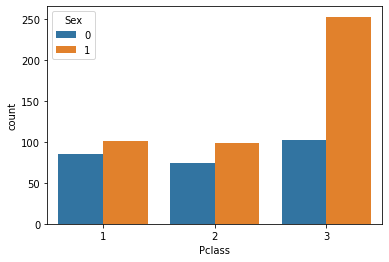

In [21]:
sns.countplot(data=df,x="Pclass",hue="Sex")

## task 3 : Co phai do tuoi cang lon thi xac suat tu vong cang cao ?

In [22]:
task3 = df[["Age","Survived"]]

In [23]:
task3["Age group"] = 0
task3.loc[task3["Age"] < 18, "Age group"] = 0                             # tre em, vi thanh nien
task3.loc[(task3["Age"] >= 18) & (task3["Age"] < 40), "Age group"] = 1    # thanh thieu nien
task3.loc[(task3["Age"] >= 40) & (task3["Age"] < 65), "Age group"] = 2    # trung nien
task3.loc[task3["Age"] >= 65, "Age group"] = 3                            # cao nien

C:\Users\HaoLE\AppData\Local\Temp\ipykernel_11516\2171043698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task3["Age group"] = 0


In [24]:
task3.groupby("Age group")["Survived"].count()

Age group
0    113
1    438
2    152
3     11
Name: Survived, dtype: int64

In [25]:
task3.groupby("Age group")["Survived"].mean()

Age group
0    0.539823
1    0.383562
2    0.394737
3    0.090909
Name: Survived, dtype: float64

In [26]:
task3.corr()

,Age,Survived,Age group
Age,1.000000,-0.077221,0.904372
Survived,-0.077221,1.000000,-0.103949
Age group,0.904372,-0.103949,1.000000


conclusion : bien survived co tuong quan am (negative correlation) voi bien age va age group. tuoi cang cao kha nang song sot cang giam --> kha nang tu vong cang cao.

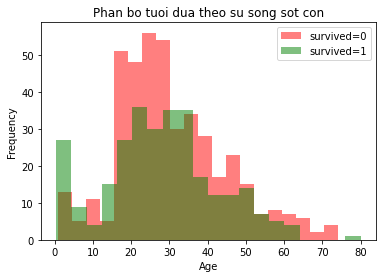

In [27]:
plt.hist(df[df['Survived'] == 0]['Age'], bins=20, color='red', alpha=0.5, label='survived=0')
plt.hist(df[df['Survived'] == 1]['Age'], bins=20, color='green', alpha=0.5, label='survived=1')

plt.title('Phan bo tuoi dua theo su song sot con')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

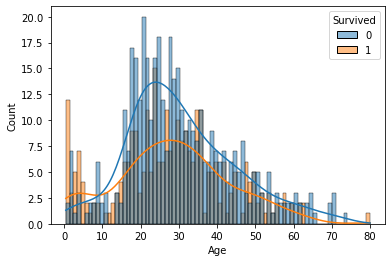

In [44]:
sns.histplot(data=df, x="Age", hue="Survived", bins=80, kde=True)

## task 4 : Hanh khach o hang ve nao co ti le song sot cao nhat ?

In [28]:
task4 = df[["Pclass","Survived"]]

In [29]:
task4.groupby("Pclass").count()

,Survived
Pclass,
1,186
2,173
3,355


In [30]:
task4.groupby("Pclass").mean()

,Survived
Pclass,
1,0.655914
2,0.479769
3,0.239437


conclusion : hanh khach o hang ve 1 co ti le song sot cao nhat

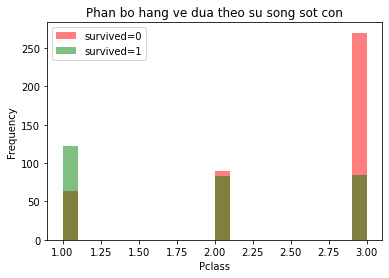

In [31]:
plt.hist(df[df['Survived'] == 0]['Pclass'], bins=20, color='red', alpha=0.5, label='survived=0')
plt.hist(df[df['Survived'] == 1]['Pclass'], bins=20, color='green', alpha=0.5, label='survived=1')

plt.title('Phan bo hang ve dua theo su song sot con')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## task 5 : Co phai gia ve ti le thuan voi co hoi song sot khong ? 

In [32]:
task5 = df[["Fare","Survived"]]

In [33]:
task5["Fare group"] = 0
task5.loc[task5["Fare"] < 50, "Fare group"] = 0                           
task5.loc[(task5["Fare"] >= 50) & (task5["Fare"] < 100), "Fare group"] = 1   
task5.loc[(task5["Fare"] >= 100) & (task5["Fare"] < 150), "Fare group"] = 2
task5.loc[(task5["Fare"] >= 150) & (task5["Fare"] < 200), "Fare group"] = 3    
task5.loc[task5["Fare"] >= 200, "Fare group"] = 4  

C:\Users\HaoLE\AppData\Local\Temp\ipykernel_11516\2769163931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task5["Fare group"] = 0


In [34]:
task5.groupby("Fare group")["Survived"].count()

Fare group
0    576
1     90
2     21
3      9
4     18
Name: Survived, dtype: int64

In [35]:
task5.groupby("Fare group")["Survived"].mean()

Fare group
0    0.333333
1    0.688889
2    0.761905
3    0.666667
4    0.777778
Name: Survived, dtype: float64

In [36]:
task5.corr()

,Fare,Survived,Fare group
Fare,1.000000,0.268189,0.918928
Survived,0.268189,1.000000,0.261209
Fare group,0.918928,0.261209,1.000000


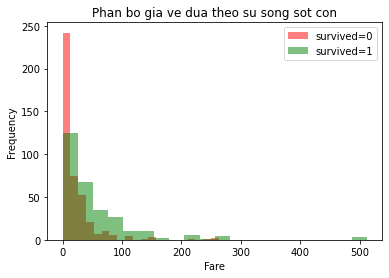

In [37]:
plt.hist(task5[task5['Survived'] == 0]['Fare'], bins=20, color='red', alpha=0.5, label='survived=0')
plt.hist(task5[task5['Survived'] == 1]['Fare'], bins=20, color='green', alpha=0.5, label='survived=1')

plt.title('Phan bo gia ve dua theo su song sot con')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## task 6 : Neu hang bao hiem phai boi thuong cho nhung nan nhan tu vong bang 15 lan gia ve ho da mua, hoi tong so tien boi thuong ? 

In [38]:
task6 = df[df["Survived"]==0]["Fare"]
sum(task6)*15

146060.3024999999

# task 7 : co phai hanh khach nu co co hoi song sot cao hon nam ?

In [39]:
task7 = df[["Sex","Survived"]]
task7.groupby("Sex").count()

,Survived
Sex,
0,261
1,453


In [40]:
task7.groupby("Sex").mean()

,Survived
Sex,
0,0.754789
1,0.205298


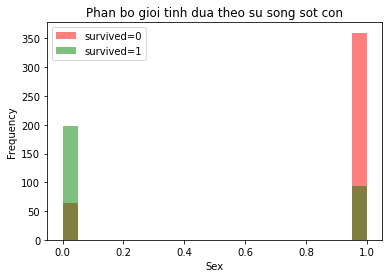

In [41]:
plt.hist(df[df['Survived'] == 0]['Sex'], bins=20, color='red', alpha=0.5, label='survived=0')
plt.hist(df[df['Survived'] == 1]['Sex'], bins=20, color='green', alpha=0.5, label='survived=1')

plt.title('Phan bo gioi tinh dua theo su song sot con')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## task 8 : dua ra dac diem chung cua nhom nhung hanh khach co ti le tu vong cao nhat (gioi tinh, gia ve, hang ve)

Gioi tinh (task 7) : nam co ti le tu vong cao hon nu --> nam

Gia ve (task 5) : gia ve cang thap ti le tu vong cang cao --> gia ve thap

Hang ve (task 4) : hang ve cang thap ti le tu vong cang cao --> hang ve thap

Tuoi (task 3) : nhom tuoi >65 co ti le tu vong cao nhat --> tuoi gia

In [42]:
df[["Survived","Pclass","Sex","Age","Fare"]].corr()

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.359653,-0.538826,-0.077221,0.268189
Pclass,-0.359653,1.000000,0.155460,-0.369226,-0.554182
Sex,-0.538826,0.155460,1.000000,0.093254,-0.184994
Age,-0.077221,-0.369226,0.093254,1.000000,0.096067
Fare,0.268189,-0.554182,-0.184994,0.096067,1.000000


## task 9 : dac diem chung cua nhom hanh khach co ti le tu vong thap nhat 

Gioi tinh (task 7) : nu co ti le tu vong thap hon nam --> nu 

Gia ve ( task 5) : gia ve cang cao ti le tu vong cang thap --> gia ve cao

Hang ve (task 4) : hang ve hang sang co ti le tu vong thap hon hang ve binh thuong --> hang ve hang sang

Tuoi (task 3) : nhom tuoi < 18 co ti le tu vong thap nhat --> tre em & vi thanh nien